In [8]:
from net_work_def import  MtlNetwork_head, MtlNetwork_body, MtlNetwork_body2
import pickle
import matplotlib as mpl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
subjects = [f'sub{s}' for s in range(1, 2)]
ddir = 'replicate_pickle_data'

subject_data = {}
for subject in tqdm(subjects):

    # load subject data
    with open(f'{ddir}/{subject}/data_align.pkl', 'rb') as f:
        data_align = pickle.load(f)
    f.close()
    with open(f'{ddir}/{subject}/ppgnp_align.pkl', 'rb') as f:
        ppgnp_align = pickle.load(f)
    f.close()
    with open(f'{ddir}/{subject}/trainX.pkl', 'rb') as f:
        trainX = pickle.load(f)
    f.close()
    with open(f'{ddir}/{subject}/trainY.pkl', 'rb') as f:
        trainY = pickle.load(f)
    f.close()
    with open(f'{ddir}/{subject}/pulR.pkl', 'rb') as f:
        pulR = pickle.load(f)
    f.close()

    trainX = np.array(trainX, dtype = np.float32)
    trainY = np.array(trainY, dtype = np.float32)
    trainY = trainY - trainY.min(axis = 1)[:, np.newaxis]


    subject_data[subject] = {
        'data_align': data_align,
        'ppgnp_align': ppgnp_align,
        'trainX': trainX,
        'trainY': trainY,
        'pulR': pulR
    }

100%|██████████| 1/1 [00:36<00:00, 36.86s/it]


In [10]:
mod_subject = 'sub1' # for personalized
body = MtlNetwork_body(num_classes = 128)  # for persoanlized
head =  MtlNetwork_head(85)  # for personalized
nn = tf.keras.Sequential([body, head])  # for persoanlized
# nn = MtlNetwork_body2(num_classes = 85)  # for mtl

# nn.load_weights(f'nn_weights/{mod_subject}/weights')  # for personalized
# nn.load_weights(f'inprocess_weights/shared_body')  # for mtl
nn.load_weights(f'nn_weights/generalized-sub1/shared_body')  # for mtl final saved


AssertionError: Nothing to load. No dependencies have been added to <keras.engine.sequential.Sequential object at 0x7ffa12d95a90> yet.

In [ ]:
np.mean([
    6.32, 4.53, 4.35, 5.21, 15.63, 8.53, 1.58
])

6.5928571428571425

In [ ]:
%load_ext memory_profiler
from datetime import datetime
batch_size = 40
batch_size_ppg = 85

batches = 220
gtV = []
recPPG = []

i_start = 1000

data_align = subject_data[mod_subject]['data_align']
ppgnp_align = subject_data[mod_subject]['ppgnp_align']
trainX = subject_data[mod_subject]['trainX']
trainY = subject_data[mod_subject]['trainY']
pulR = subject_data[mod_subject]['pulR']

for j in range(batches):
    try:
        i = i_start + j * batch_size
        tX = np.reshape(data_align[i: i + batch_size: 1, :, :, :], [batch_size, 100, 100])
        tX = np.array(tX, dtype= np.float64)
        tX = np.moveaxis(tX, 0, -1)
        
        p_point = np.int(np.round(i * 64 / 30))
        gt = pulR[p_point: p_point + batch_size_ppg: 1, 0]
        gt = (gt - gt.min()) / (gt.max() - gt.min())
        
        tX1 = np.reshape(tX, [-1, 100, 100, batch_size])
        tX1 = (tX1 - tX1.min())/(tX1.max() - tX1.min())

        def measure_code_block():
            t1 = datetime.today()
            predd = nn(tX1, training = False)
            t2 = datetime.today()
            print('Elaped time: ', t2 - t1)
            return predd
        predd = %memit measure_code_block()
        
        olap =  np.int(batch_size * 64 / 30)    
        recPPG += predd.numpy().flatten().tolist()
        gtV += np.squeeze(gt * 2 - 1).tolist() 
    except: print('skipped')

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


/Users/samuelhmorton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Elaped time:  0:00:00.159728
peak memory: 1428.16 MiB, increment: 0.00 MiB
skipped


/Users/samuelhmorton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Elaped time:  0:00:00.129747
peak memory: 1397.14 MiB, increment: 4.95 MiB
skipped
Elaped time:  0:00:00.094309
peak memory: 1392.39 MiB, increment: 0.07 MiB
skipped
Elaped time:  0:00:00.138485
peak memory: 1397.17 MiB, increment: 4.82 MiB
skipped
Elaped time:  0:00:00.134446
peak memory: 1380.10 MiB, increment: -1.00 MiB
skipped
Elaped time:  0:00:00.095027
peak memory: 1352.14 MiB, increment: 0.04 MiB
skipped
Elaped time:  0:00:00.097311
peak memory: 1345.18 MiB, increment: -6.93 MiB
skipped
Elaped time:  0:00:00.121430
peak memory: 1332.14 MiB, increment: 0.00 MiB
skipped
Elaped time:  0:00:00.159995
peak memory: 1319.66 MiB, increment: 3.97 MiB
skipped
Elaped time:  0:00:00.104383
peak memory: 1317.67 MiB, increment: 2.94 MiB
skipped
Elaped time:  0:00:00.179363
peak memory: 1319.58 MiB, increment: 4.79 MiB
skipped
Elaped time:  0:00:00.139413
peak memory: 1317.48 MiB, increment: 3.69 MiB
skipped
Elaped time:  0:00:00.086860
peak memory: 1313.87 MiB, increment: 0.07 MiB
skipped
El

In [ ]:
from scipy.signal import resample
from pipeline_v1.signal_pross import bandpass, get_hrv, min_max_scale, n_moving_avg

# processing method similar to that in MoodBoost
pred = recPPG
targ = gtV

def process_signal(y_true, y_pred, smoothing_window = 10, use_bandpass = False):

    if y_pred is not None:
        orig_len = len(y_pred)
        y_pred = n_moving_avg(y_pred, smoothing_window)
        y_pred = resample(y_pred, orig_len)
        if use_bandpass:
            y_pred = bandpass(y_pred, 64, [0.67, 4.0], 4)
        y_pred = min_max_scale(y_pred)
        
    # process the ground truth
    if y_true is not None:
        y_true = n_moving_avg(y_true, 20)
        y_true = resample(y_true, orig_len)
        if use_bandpass:
            y_true = bandpass(y_true, 64, [0.67, 4.0], 4)
        y_true = min_max_scale(y_true)
    
    return y_true, y_pred

targ, pred = process_signal(targ, pred, smoothing_window = 20, use_bandpass = True)

ValueError: invalid number of data points (0) specified

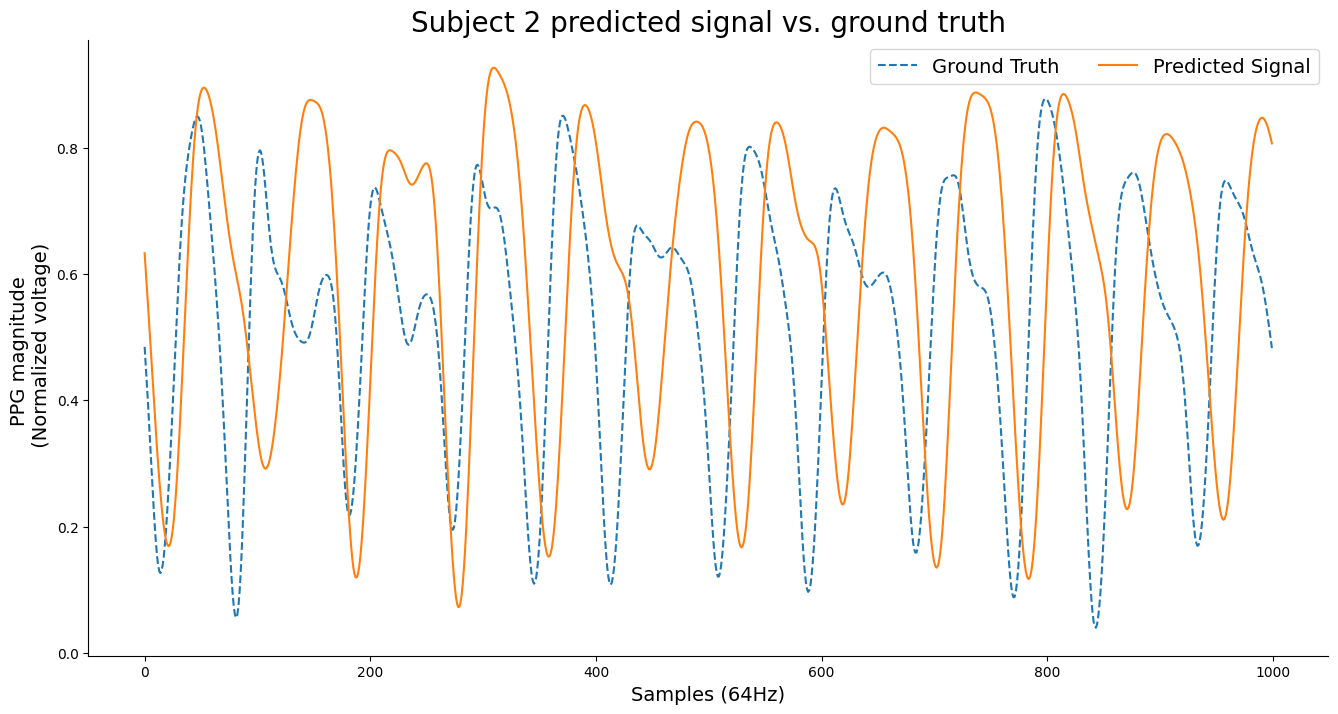

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(targ[0: 1000], linestyle='--')
ax.plot(pred[0: 1000])
plt.legend(["Ground Truth", "Predicted Signal"], fontsize = 14, loc = "upper right", ncol = 2)
plt.xlabel('Samples (64Hz)', fontsize = 14)
plt.ylabel('PPG magnitude \n (Normalized voltage)', fontsize = 14)
plt.title('Subject 2 predicted signal vs. ground truth', fontsize = 20)

plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

In [ ]:
# break targ and pred up into ~15s chunks
tot_chunks = len(targ) // (64 * 15)

chunks = []
for i in range(tot_chunks):
    chunks.append((targ[i * 64 * 15: (i + 1) * 64 * 15], pred[i * 64 * 15: (i + 1) * 64 * 15]))

In [ ]:
from pipeline_v1.peaks import get_peaks_for_hr
from pipeline_v1.signal_pross import get_ibis, get_hr, get_hrv

def get_predicted_peaks(signal):
    return get_peaks_for_hr(signal, 64, 3.0, -1, prominence = 0.32, with_min_dist = True, with_valleys = False)
    
def get_true_peaks(signal):
    return get_peaks_for_hr(signal, 64, 3.0, -1, prominence = 0.28, with_min_dist = True, with_valleys = False)

errs = []
for t, p in chunks:
    
    pred_peaks, _ = get_predicted_peaks(p)
    true_peaks, _ = get_true_peaks(t)

    pred_ibis = get_ibis(pred_peaks, 64)
    true_ibis = get_ibis(true_peaks, 64)

    pred_hr = get_hr(pred_ibis)
    true_hr = get_hr(true_ibis)

    pred_hrv = get_hrv(pred_ibis)
    true_hrv = get_hrv(true_ibis)

    errs.append((
        np.abs(pred_hr - true_hr),
        np.abs(pred_hrv - true_hrv),
        np.abs(len(pred_peaks) - len(true_peaks))
    ))

print('HR Err:', np.mean([e[0] for e in errs]))
print('HRV Err: ', np.mean([e[1] for e in errs]))
print('Peaks Err:', np.mean([e[2] for e in errs]))

HR Err: 8.50275397456337
HRV Err:  0.2777271691711316
Peaks Err: 2.0526315789473686


In [ ]:
np.mean([
    1.11, 1.74, 2.06, 1.26, 1.53, 0.21, 2.05
])

1.422857142857143